# FCNN for MNIST Digit Classification

In [1]:
from keras.optimizers.legacy import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


In [2]:

# Define a FCNN with one neuron
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1, activation='softmax')
])

# Define a FCNN with one hidden layer
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



In [3]:

# Compile the models
model1.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [4]:

# Train the models
history1 = model1.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135


In [5]:
history2 = model2.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2610 - accuracy: 0.9261 - val_loss: 0.1350 - val_accuracy: 0.9601
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1144 - accuracy: 0.9663 - val_loss: 0.1019 - val_accuracy: 0.9709
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0803 - accuracy: 0.9763 - val_loss: 0.0939 - val_accuracy: 0.9706
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0597 - accuracy: 0.9819 - val_loss: 0.0837 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 0.0772 - val_accuracy: 0.9761


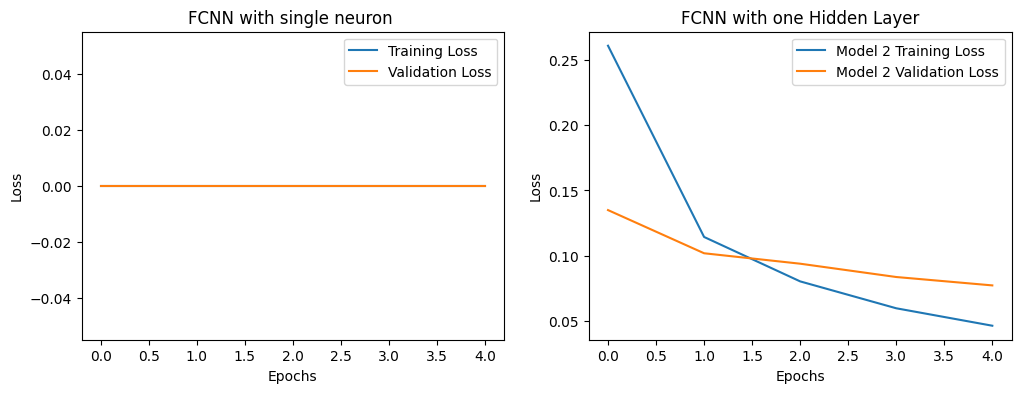

In [7]:

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('FCNN with single neuron ')
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('FCNN with one Hidden Layer')
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()